In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pylab 
%matplotlib inline


In [5]:
df = pd.read_csv('FuelConsumption.csv')
df.head(4)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(4)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255


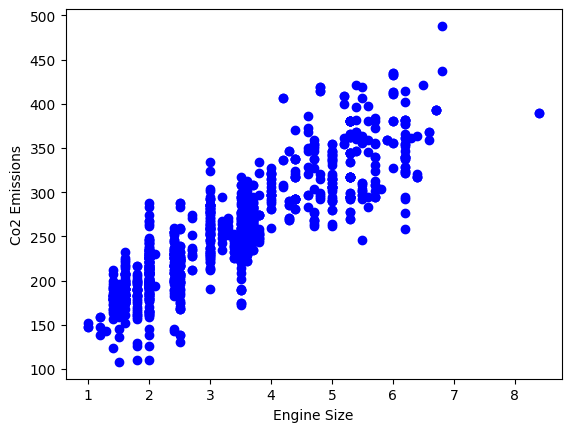

In [7]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

In [8]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

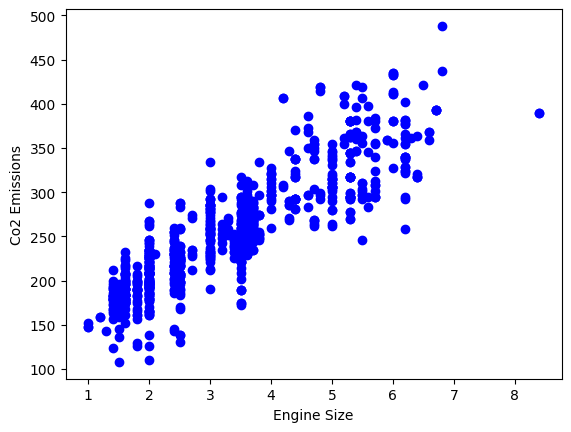

In [10]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS ,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

In [20]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

print('Coefficients' , regr.coef_)
print('Intercept' ,regr.intercept_)

Coefficients [[11.32634668  7.35848619  9.43072959]]
Intercept [65.83157858]


In [21]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum of squares: %.2f' %np.mean((y_hat-y)**2))

print('Variance score: %.2f' % regr.score(x,y))

Residual sum of squares: 503.34
Variance score: 0.87


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
